# Part II -Communicate the data findings from loan data at Prosper
## by  Gabriel Ntwari


## Investigation Overview

### Introduction
>This project aims to reveal any insights gleaned from my data exploration. 
The goal is to use exploratory and explanatory data analysis approaches to analyze the Prosper Loans dataset and identify actionable insights.

## Dataset Overview

> The dataset is from Prosper Marketplace Inc. a company that provides loans to a borrowers. It contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.Based on the mentioned variables a loan can be granted or not.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
#Dropping columns with 75 % or more of Missing Values in their content
perctange =75
min_count =  int(((100-perctange)/100)*loan_data.shape[0] + 1)
loan_data = loan_data.dropna( axis=1, thresh=min_count)
# remove columns and columns withat are not useful in the Dateset
loan_data.drop(['ListingKey', 'ListingNumber', 'CreditGrade', 
                'ClosedDate', 'CurrentlyInGroup', 'DateCreditPulled', 
                'FirstRecordedCreditLine', 'EmploymentStatusDuration',
                'DebtToIncomeRatio','LoanKey'], axis=1, inplace = True)
# filter out loans without ProsperScores
loan_data_cleanned= loan_data[loan_data['ProsperScore'].isnull()==False]

loan_data_cleanned['Occupation']=loan_data_cleanned['Occupation'].fillna('Not Mentioned')
loan_data_cleanned['ListingCreationDate']=pd.to_datetime(loan_data_cleanned['ListingCreationDate'])

### Income Range
The plot shows that most individual who has a loan has an income range from 40k to 75k are present in dataset, they are followed with ones of 25k to 50k. The unemployed ones and the ones with income of 0k are very few. From the graph it is not clear whether the individuals with more income are likely to get the loans and more investagatiions are required for a better conclusion.  

Income Range distribution
$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64
********************************************************************************


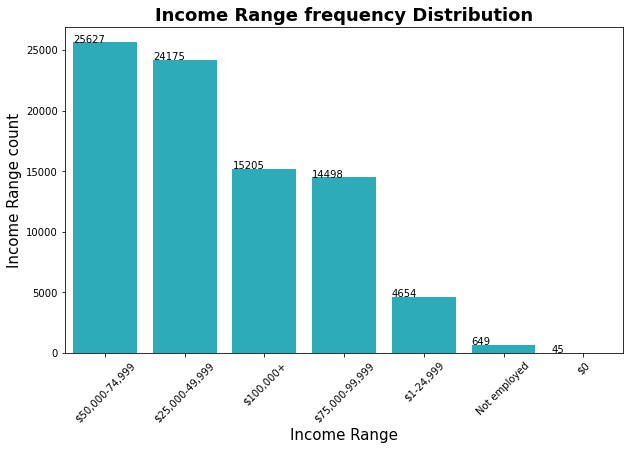

In [4]:
print("Income Range distribution")
print(loan_data_cleanned['IncomeRange'].value_counts())
print(40*('**'))
plt.figure(figsize=[10, 6])
ax=sns.countplot(data = loan_data_cleanned, x = 'IncomeRange', color = sns.color_palette()[9])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x(), p.get_height()))
    
plt.title('Income Range frequency Distribution',fontsize=18,fontweight="bold")
plt.ylabel('Income Range count',fontsize=15)
plt.xlabel('Income Range',fontsize=15)
plt.xticks(rotation=45)
plt.show()


### Employment Status distribution
The plot shows that it is rare that unemployed and retired individual seek for loans from Prosper. Around 79.3% of loan seekers are employed people,9.3% are full_time, while self-employed people are 5.3%. 


Employment Status distribution
Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64
********************************************************************************


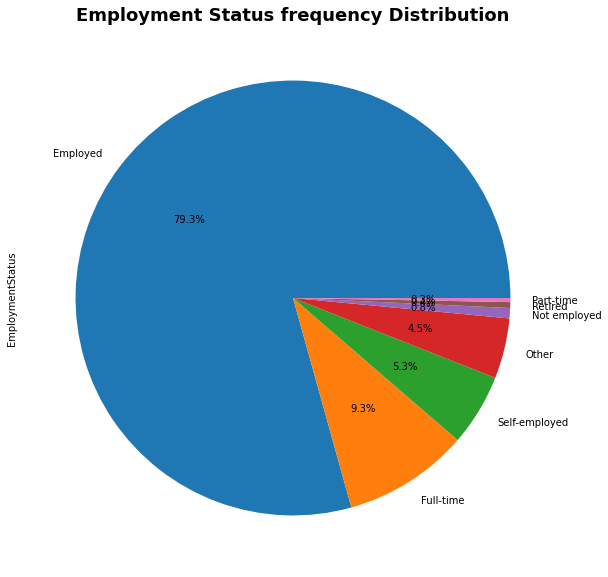

In [5]:
print("Employment Status distribution")
print(loan_data_cleanned['EmploymentStatus'].value_counts())
print(40*('**'))

# plotting
plt.figure(figsize=(10,10))
loan_data_cleanned['EmploymentStatus'].value_counts().plot(kind='pie',autopct='%1.1f%%');

# labels
plt.title('Employment Status frequency Distribution',fontsize=18,fontweight="bold");


### Prosper score vs Borrower annual Percentage Rate
The plot shows that as the BorrowAPR increases, the ProsperScore reduces,There is a negative correlation between these variables. This make sense becasue people with higher rating tend to be more reliable and therefore given lower BorrowerAPR


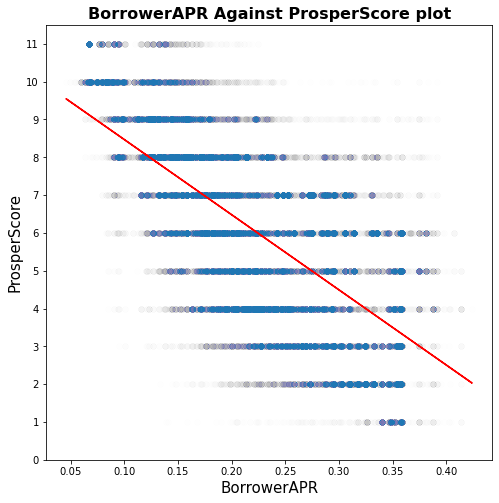

In [6]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [8, 8]) 
plt.scatter(data = loan_data_cleanned, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
a, b = np.polyfit(loan_data_cleanned['BorrowerAPR'], loan_data_cleanned['ProsperScore'], 1)
plt.plot(loan_data_cleanned['BorrowerAPR'], a*loan_data_cleanned['BorrowerAPR']+b,color='r')  
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR Against ProsperScore plot',fontsize=16,fontweight="bold")
plt.xlabel('BorrowerAPR',fontsize=15)
plt.ylabel('ProsperScore',fontsize=15)
plt.show()

#### Yearly average borrowers rate vs Home Ownerneship
According to the plot, and based on yearly averages, from 2009 to 2014, people with homes are given low rates compared with people without houses.
It does seem like homeowners have a slightly lower rate that non-homeowners.


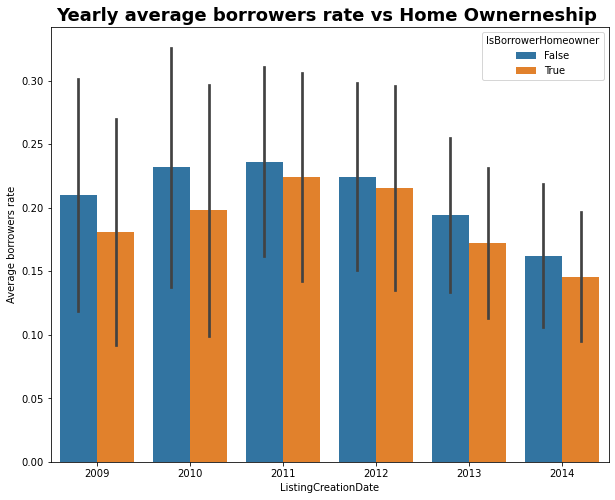

In [7]:
plt.figure(figsize=[10, 8]);
sns.barplot(data = loan_data_cleanned, x = loan_data_cleanned['ListingCreationDate'].apply(lambda x: x.year),
            y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', ci = 'sd');
plt.ylabel('Average borrowers rate');
plt.title('Yearly average borrowers rate vs Home Ownerneship ',fontsize=18,fontweight="bold");
plt.show()

### Correlations
There are two strong positive relationships between BorrowerRate and BorrowerAPR, and between BorrowerAPR and EstimatedReturn, this means the rates and returns are dependent to borrower APR. BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. Similarly, higher CreditScore means the borrowers are more trustworthy, therefore it recevied lower APR.

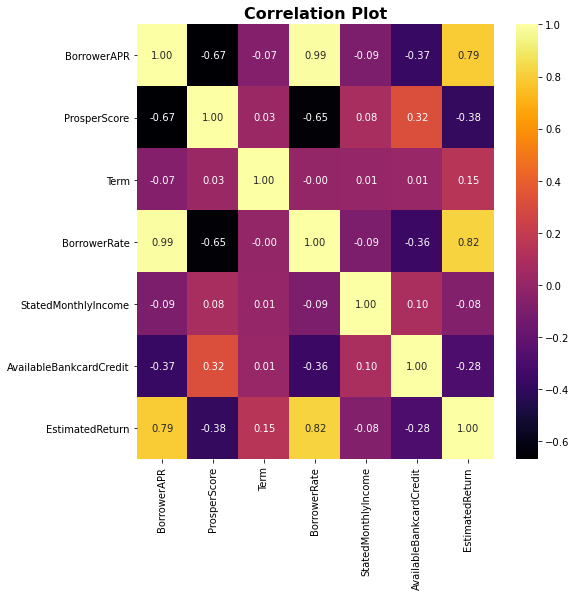

In [8]:
# correlation plot 

columns = ['BorrowerAPR', 'ProsperScore','Term','BorrowerRate',
            'StatedMonthlyIncome', 'AvailableBankcardCredit','EstimatedReturn']

plt.figure(figsize = [8, 8])
sns.heatmap(loan_data_cleanned[columns].corr(), annot = True, fmt = '.2f',
           cmap = 'inferno')
plt.title('Correlation Plot',fontsize=16,fontweight="bold") 
plt.show()

In [10]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt